## Báo cáo giai đoạn 3

## Nhóm `CHNT`: 
  + Nguyễn Văn Hùng	- 1712222
  + Huỳnh Trí Cơ - 1712303
  + Nguyễn Thị Tuyết - 1712893
  + Nguyễn Đình Hoàng Nguyên - 19120606

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import ast
from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

import xgboost as xgb
import lightgbm as lgb


import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("train.csv", encoding='utf-8')
AdditionalFeatures = pd.read_csv('TrainAdditionalFeatures.csv', encoding='utf-8')
df = pd.merge(df, AdditionalFeatures, how='left', on=['imdb_id'])
df.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,status,tagline,title,Keywords,cast,crew,revenue,popularity2,rating,totalVotes
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,10.400,5.0,482.0
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,15.229,6.4,1528.0
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,26.082,8.4,7314.0
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,5.531,7.5,115.0
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,NaN,NaN,NaN


## **Giai đoạn 2**:

### **2.1. Chuẩn bị dữ liệu**

#### **2.1.1. Tình trạng khuyết dữ liệu**

In [3]:
null_df = pd.DataFrame(df.isnull().sum(), columns=["Số mẫu bị thiếu"])
null_df["Tỉ lệ bị thiếu"] = np.round(df.isnull().sum() / df.shape[0] * 100, 2)
null_df.index.name = "Thuộc tính"
null_df = null_df.sort_values(by="Tỉ lệ bị thiếu", ascending=False)
null_df.loc[null_df["Tỉ lệ bị thiếu"] > 0]

,Số mẫu bị thiếu,Tỉ lệ bị thiếu
Thuộc tính,,
belongs_to_collection,2396,79.87
homepage,2054,68.47
tagline,597,19.90
Keywords,276,9.20
production_companies,156,5.20
totalVotes,118,3.93
popularity2,118,3.93
rating,118,3.93
production_countries,55,1.83


**Nhận xét:**:
- Dữ liệu có 13 thuộc tính bị thiếu dữ liệu.
- Trong đó, có 3 thuộc tính bị thiếu dữ liệu nghiêm trọng:
  + Thuộc tính **`belongs_to_collection`** với số lượng bị thiếu là **`2396`**, tỉ lệ bị thiếu là **`79.87%`**.
  + Thuộc tính **`homepage`** với số lượng bị thiếu là **`2054	`**, tỉ lệ bị thiếu là **`68.47%`**.
  + Thuộc tính **`tagline`** với số lượng bị thiếu là **`597`**, tỉ lệ bị thiếu là **`19.90%`**.

**Tại sao dữ liệu bị thiếu:**
- Giải thích:
  + Lỗi nhập liệu: Khi nhập dữ liệu cho các bộ phim, có những thông tin mà bộ phim không có thì người nhập liệu sẽ bỏ qua luôn thông tin đó.
  + Ví dụ: Thuộc tính **`belongs_to_collection`**, nếu bộ phim đó thuộc bộ sưu tập nào đó thì người nhập liệu sẽ điền thông tin của bộ sưu tập, nếu không có thì người nhập liệu sẽ bỏ qua.
  + Đa số dữ liệu bị thiếu trong bộ dữ liệu này đều bị lỗi nhập liệu như trên.
  + Ngoài ra còn một số lỗi dẫn đến việc dữ liệu bị thiếu: Lỗi kỹ thuật, sai sót trong lúc thu nhập dữ liệu,...

**Các cách giải quyết vấn đề dữ liệu bị thiếu:**
- Đa số dữ liệu bị thiếu trong bộ dữ liệu này đều bị lỗi nhập liệu: Có dữ liệu thì sẽ nhập, còn không sẽ vị để trống.
- Cách giải quyết:
 + Điền là **`1`** tượng trưng cho việc có, **`0`** tượng trưng việc không.
 + Điền một giá trị tương ứng vào ô dữ liệu bị thiếu: giá trị trung bình **`mean`**, giá trị trung vị **`median`**,...
 + Bỏ thuộc tính dữ liệu.
 + Bỏ mẫu dữ liệu.

#### **2.1.2. Loại bỏ thuộc tính không có ý nghĩa**

- Các thuộc tính nhận diện bộ phim như **`id`**, **`imdb_id`**
- Các cột thuộc tính còn lại cần xem xét kĩ hơn trước khi quyết định có loại bỏ hay không.

In [4]:
delete_columns = ["id", "imdb_id"]
df.drop(delete_columns, inplace=True, axis=1)

In [5]:
df.shape

(3000, 24)

In [6]:
df.columns

Index(['belongs_to_collection', 'budget', 'genres', 'homepage',
       'original_language', 'original_title', 'overview', 'popularity',
       'poster_path', 'production_companies', 'production_countries',
       'release_date', 'runtime', 'spoken_languages', 'status', 'tagline',
       'title', 'Keywords', 'cast', 'crew', 'revenue', 'popularity2', 'rating',
       'totalVotes'],
      dtype='object')

#### **2.1.3. Thay đổi một số dữ liệu của thuộc tính**

- Ta thay đổi:
  + Thuộc tính **`belongs_to_collection`**, **`homepage`**, **`poster_path`**, **`tagline`** nếu có dữ liệu ta sẽ để là 1 và không có dữ liệu là 0.
  + Thuộc tính **`release_date`** ta thấy thành 5 thuộc tính con:
    + **`release_day`**: ngày phát hành.
    + **`release_month`**: tháng phát hành
    + **`release_year`**: năm phát hành.
    + **`release_dayofweek`**: ngày trong tuần phát hành.
    + **`release_quarter`**: quý phát hành.
  + Thuộc tính **`genres`**, **`production_companies`**, **`production_countries`**, **`spoken_languages`**, **`Keywords`**, **`cast`**, **`crew`**: ta lấy tất cả tên của các dữ liệu trong thuộc tính.

In [7]:
def text_to_dict(df, dict_columns):
    for column in dict_columns:
        df[column] = df[column].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x))

In [8]:
dict_columns = ["belongs_to_collection", "genres", "production_companies", "production_countries", 
                "spoken_languages", "Keywords", "cast", "crew"]
text_to_dict(df, dict_columns)

In [9]:
df["belongs_to_collection"] = df["belongs_to_collection"].apply(lambda x: 1 if x != {} else 0)
df["homepage"] = df["homepage"].notnull().astype(int)
df["poster_path"] = df["poster_path"].notnull().astype(int)

In [10]:
df["release_date"] = pd.to_datetime(df["release_date"], format="%m/%d/%y")
df["release_day"] = df["release_date"].apply(lambda x: x.day)
df["release_month"] = df["release_date"].apply(lambda x: x.month)
df["release_year"] = df["release_date"].apply(lambda x: x.year)
df['release_dayofweek'] = df["release_date"].dt.dayofweek
df['release_quarter'] = df["release_date"].dt.quarter

In [11]:
df['genre_names'] = df['genres'].apply(lambda x: [names['name'] for names in x])
df['production_companies_names'] = df['production_companies'].apply(lambda x: [names['name'] for names in x])
df['production_countries_names'] = df['production_countries'].apply(lambda x: [names['name'] for names in x])
df['spoken_languages_tag'] = df['spoken_languages'].apply(lambda x: [names['iso_639_1'] for names in x])
df['Keywords_tag'] = df['Keywords'].apply(lambda x: [names['name'] for names in x])
df['cast_names'] = df['cast'].apply(lambda x: [names['name'] for names in x])
df['crew_names'] = df['crew'].apply(lambda x: [names['name'] for names in x])
df['cast_count'] = df['cast_names'].apply(lambda x : len(x))
df['crew_count'] = df['crew_names'].apply(lambda x : len(x))

In [12]:
df['isTitleDifferent'] = 1
df.loc[df['original_title'] == df['title'] ,"isTitleDifferent"] = 0
df['overview_word_count'] = df['overview'].str.split().str.len()
df['tagline_word_count'] = df['tagline'].str.split().str.len()

In [13]:
df.drop(["release_date", "genres", "production_companies", "production_countries", 
         "spoken_languages", "Keywords", "cast", "crew", "overview", "tagline"], inplace=True, axis=1)

In [14]:
len(df.columns)

31

In [15]:
df.columns

Index(['belongs_to_collection', 'budget', 'homepage', 'original_language',
       'original_title', 'popularity', 'poster_path', 'runtime', 'status',
       'title', 'revenue', 'popularity2', 'rating', 'totalVotes',
       'release_day', 'release_month', 'release_year', 'release_dayofweek',
       'release_quarter', 'genre_names', 'production_companies_names',
       'production_countries_names', 'spoken_languages_tag', 'Keywords_tag',
       'cast_names', 'crew_names', 'cast_count', 'crew_count',
       'isTitleDifferent', 'overview_word_count', 'tagline_word_count'],
      dtype='object')

### **2.2. Phân tích - Khám phá Dữ liệu**

#### **2.2.1. Cấu trúc bộ dữ liệu**

- Dữ liệu từ (3000, 23) sau khi xử lý ta có (3000, 31).

In [16]:
df.shape

(3000, 31)

In [17]:
df.columns

Index(['belongs_to_collection', 'budget', 'homepage', 'original_language',
       'original_title', 'popularity', 'poster_path', 'runtime', 'status',
       'title', 'revenue', 'popularity2', 'rating', 'totalVotes',
       'release_day', 'release_month', 'release_year', 'release_dayofweek',
       'release_quarter', 'genre_names', 'production_companies_names',
       'production_countries_names', 'spoken_languages_tag', 'Keywords_tag',
       'cast_names', 'crew_names', 'cast_count', 'crew_count',
       'isTitleDifferent', 'overview_word_count', 'tagline_word_count'],
      dtype='object')

- Ý nghĩa bộ dữ liệu:
  -	belongs_to_collection: Có thuộc về bộ sưu tập hay không.
  -	budget: Ngân sách của phim.
  -	homepage: Phim có trang chủ hay không.
  -	original_language: Ngôn ngữ gốc của phim.
  - original_title: Tựa đề gốc của bộ phim.
  -	popularity:  Độ phổ biến của phim.
  -	poster_path: Phim có poster hay không.
  -	runtime: Thời lượng của phim.
  -	status: Tình trạng của bộ phim.
  - title: Tựa đề của bộ phim.
  -	revenue: Doanh thu của phim.
  - popularity2:  Độ phổ biến 2 của phim.
  - rating: Xếp hạng của phim.
  - totalVotes: Tổng số phiếu bầu của phim.
  - release_day: Ngày phát hành phim.
  - release_month: Tháng phát hành phim.
  - release_year: Năm phát hành phim.
  - release_dayofweek: Ngày trong tuần phát hành phim.
  - release_quarter: Mùa phát hành phim.
  - genre_names: Các thể loại của phim.
  - production_companies_names: Các nước sản xuất bộ phim.
  - production_countries_names: Các công ty sản xuất bộ phim.
  - spoken_languages_tag: Ngôn ngữ được nói trong phim.
  - Keywords_tag: Từ khóa của bộ phim.
  - cast_names: Tên các diễn viên trong phim.
  - crew_names: Tên các thành viên tham gia sản xuất phim.
  - cast_count: Số lượng diễn viên.
  - crew_count: Số lượng thành viên tham gia sản xuất phim.
  - isTitleDifferent: Tựa đề có giống tựa đề gốc hay không.
  - overview_word_count: Độ dài tóm tắt phim.
  - tagline_word_count: Độ dài khẩu hiệu phim.

- Thống kê mô tả của bộ dữ liệu:

In [18]:
df.describe()

,belongs_to_collection,budget,homepage,popularity,poster_path,runtime,revenue,popularity2,rating,totalVotes,release_day,release_month,release_year,release_dayofweek,release_quarter,cast_count,crew_count,isTitleDifferent,overview_word_count,tagline_word_count
count,3000.000000,3.000000e+03,3000.000000,3000.000000,3000.000000,2998.000000,3.000000e+03,2882.000000,2882.000000,2882.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,2992.000000,2403.000000
mean,0.201333,2.253133e+07,0.315333,8.463274,0.999667,107.856571,6.672585e+07,8.029303,6.366308,933.938584,15.046333,6.775333,2004.579667,3.255667,2.577667,20.603667,24.365667,0.117000,52.675802,8.236787
std,0.401063,3.702609e+07,0.464726,12.104000,0.018257,22.086434,1.375323e+08,4.959153,0.887465,1795.101380,8.632981,3.409115,15.480790,1.325979,1.105611,16.629635,28.066419,0.321474,28.290745,4.782021
min,0.000000,0.000000e+00,0.000000,0.000001,0.000000,0.000000,1.000000e+00,0.600000,1.000000,1.000000,1.000000,1.000000,1969.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.000000,1.000000
25%,0.000000,0.000000e+00,0.000000,4.018053,1.000000,94.000000,2.379808e+06,5.046250,5.800000,82.000000,8.000000,4.000000,1995.000000,2.000000,2.000000,11.000000,8.000000,0.000000,31.000000,5.000000
50%,0.000000,8.000000e+06,0.000000,7.374861,1.000000,104.000000,1.680707e+07,7.503500,6.400000,292.500000,15.000000,7.000000,2006.000000,4.000000,3.000000,16.000000,14.000000,0.000000,49.000000,7.000000
75%,0.000000,2.900000e+07,1.000000,10.890983,1.000000,118.000000,6.891920e+07,9.987000,7.000000,900.500000,22.000000,10.000000,2012.000000,4.000000,4.000000,24.000000,28.000000,0.000000,68.000000,10.000000
max,1.000000,3.800000e+08,1.000000,294.337037,1.000000,338.000000,1.519558e+09,45.153000,9.000000,18931.000000,31.000000,12.000000,2068.000000,6.000000,4.000000,156.000000,194.000000,1.000000,177.000000,43.000000


#### **2.2.2. Chất lượng bộ dữ liệu**

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 0 to 2999
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   belongs_to_collection       3000 non-null   int64  
 1   budget                      3000 non-null   int64  
 2   homepage                    3000 non-null   int64  
 3   original_language           3000 non-null   object 
 4   original_title              3000 non-null   object 
 5   popularity                  3000 non-null   float64
 6   poster_path                 3000 non-null   int64  
 7   runtime                     2998 non-null   float64
 8   status                      3000 non-null   object 
 9   title                       3000 non-null   object 
 10  revenue                     3000 non-null   int64  
 11  popularity2                 2882 non-null   float64
 12  rating                      2882 non-null   float64
 13  totalVotes                  2882 

- Nhận xét:
  - Còn thuộc tính:
  + **`runtime`** vẫn còn 2 giá trị **null**.
  + **`popularity2`**, **`rating`**, **`totalVotes`** vẫn còn 118 giá trị **null**.
  + **`overview_word_count`** vẫn còn 8 giá trị **null**.
  + **`tagline_word_count`** vẫn còn 597 giá trị **null**.
  - Bộ dữ liệu:
    + Có 13 thuộc tính dữ liệu dạng **`int`**.
    + Có 7 thuộc tính dữ liệu dạng **`float`**.
    + Có 11 thuộc tính dữ liệu dạng **`object`**.

In [20]:
num_columns = ["overview_word_count", "tagline_word_count", "popularity2", "rating", "totalVotes", "cast_count", "crew_count", "budget", "popularity", "runtime", "revenue"]
cate_columns = ["belongs_to_collection", "homepage", "poster_path", "status", "isTitleDifferent"]
time_columns = ["release_day", "release_month", "release_year", "release_dayofweek", "release_quarter"]

In [21]:
for i in cate_columns:
  print(i)
  print(df[i].value_counts())
  print("*"*50)

belongs_to_collection
0    2396
1     604
Name: belongs_to_collection, dtype: int64
**************************************************
homepage
0    2054
1     946
Name: homepage, dtype: int64
**************************************************
poster_path
1    2999
0       1
Name: poster_path, dtype: int64
**************************************************
status
Released    2996
Rumored        4
Name: status, dtype: int64
**************************************************
isTitleDifferent
0    2649
1     351
Name: isTitleDifferent, dtype: int64
**************************************************


#### **2.2.3. Nội dung bộ dữ liệu**

In [22]:
df.columns

Index(['belongs_to_collection', 'budget', 'homepage', 'original_language',
       'original_title', 'popularity', 'poster_path', 'runtime', 'status',
       'title', 'revenue', 'popularity2', 'rating', 'totalVotes',
       'release_day', 'release_month', 'release_year', 'release_dayofweek',
       'release_quarter', 'genre_names', 'production_companies_names',
       'production_countries_names', 'spoken_languages_tag', 'Keywords_tag',
       'cast_names', 'crew_names', 'cast_count', 'crew_count',
       'isTitleDifferent', 'overview_word_count', 'tagline_word_count'],
      dtype='object')

##### **2.2.3.1. Phân tích đơn biến**

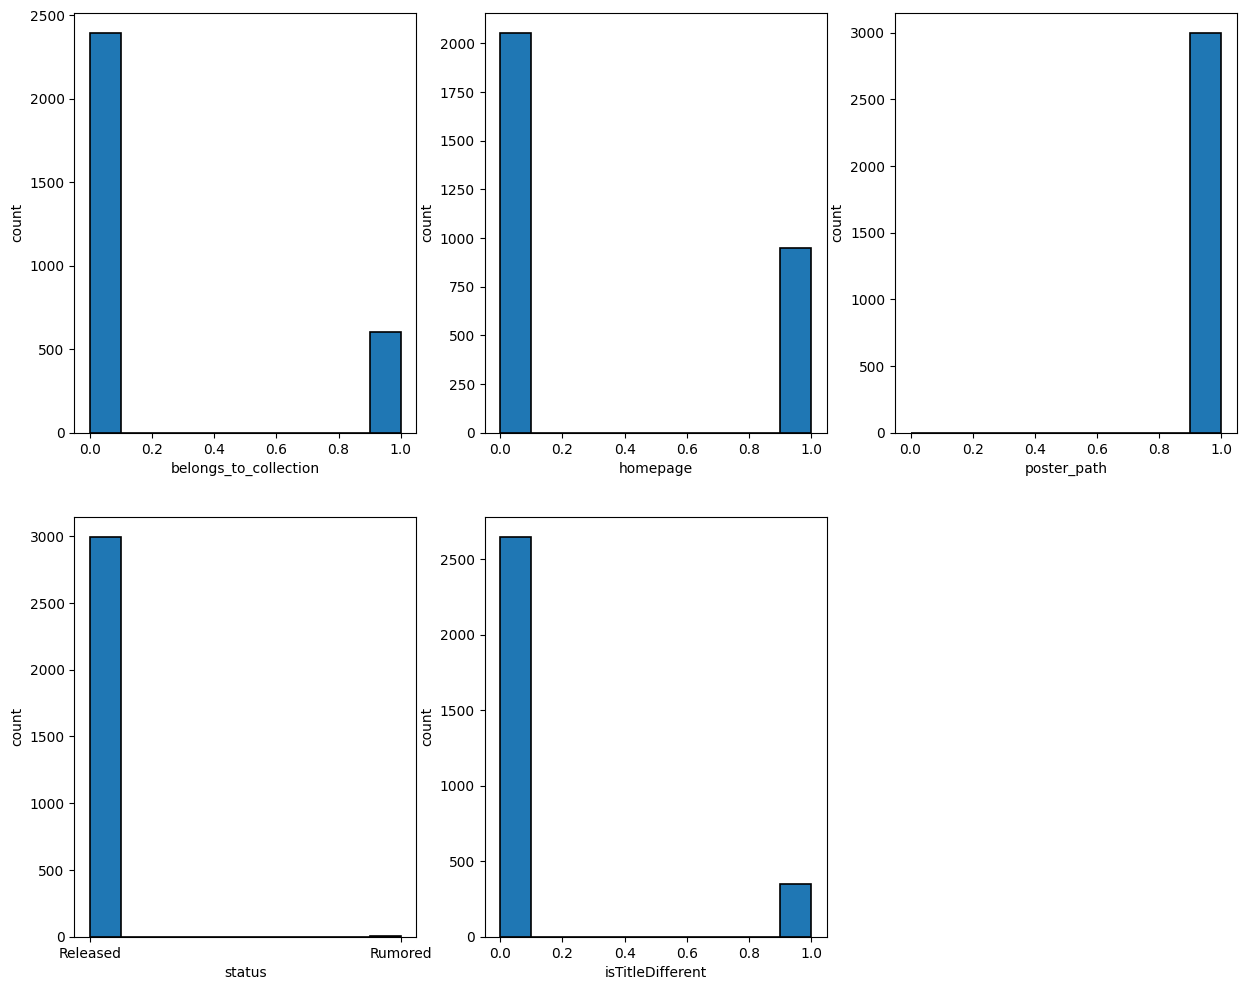

In [23]:
nrows = 2
ncols = 3
fig = plt.figure(figsize=(15, 12))
for i, col in enumerate(df[cate_columns]):
    fig.add_subplot(nrows, ncols, i + 1)
    plt.hist(data=df[cate_columns], x=col, edgecolor='black', linewidth=1.2)
    plt.xlabel(col)
    plt.ylabel("count")
#plt.savefig('fig1.png', bbox_inches='tight')
plt.show()

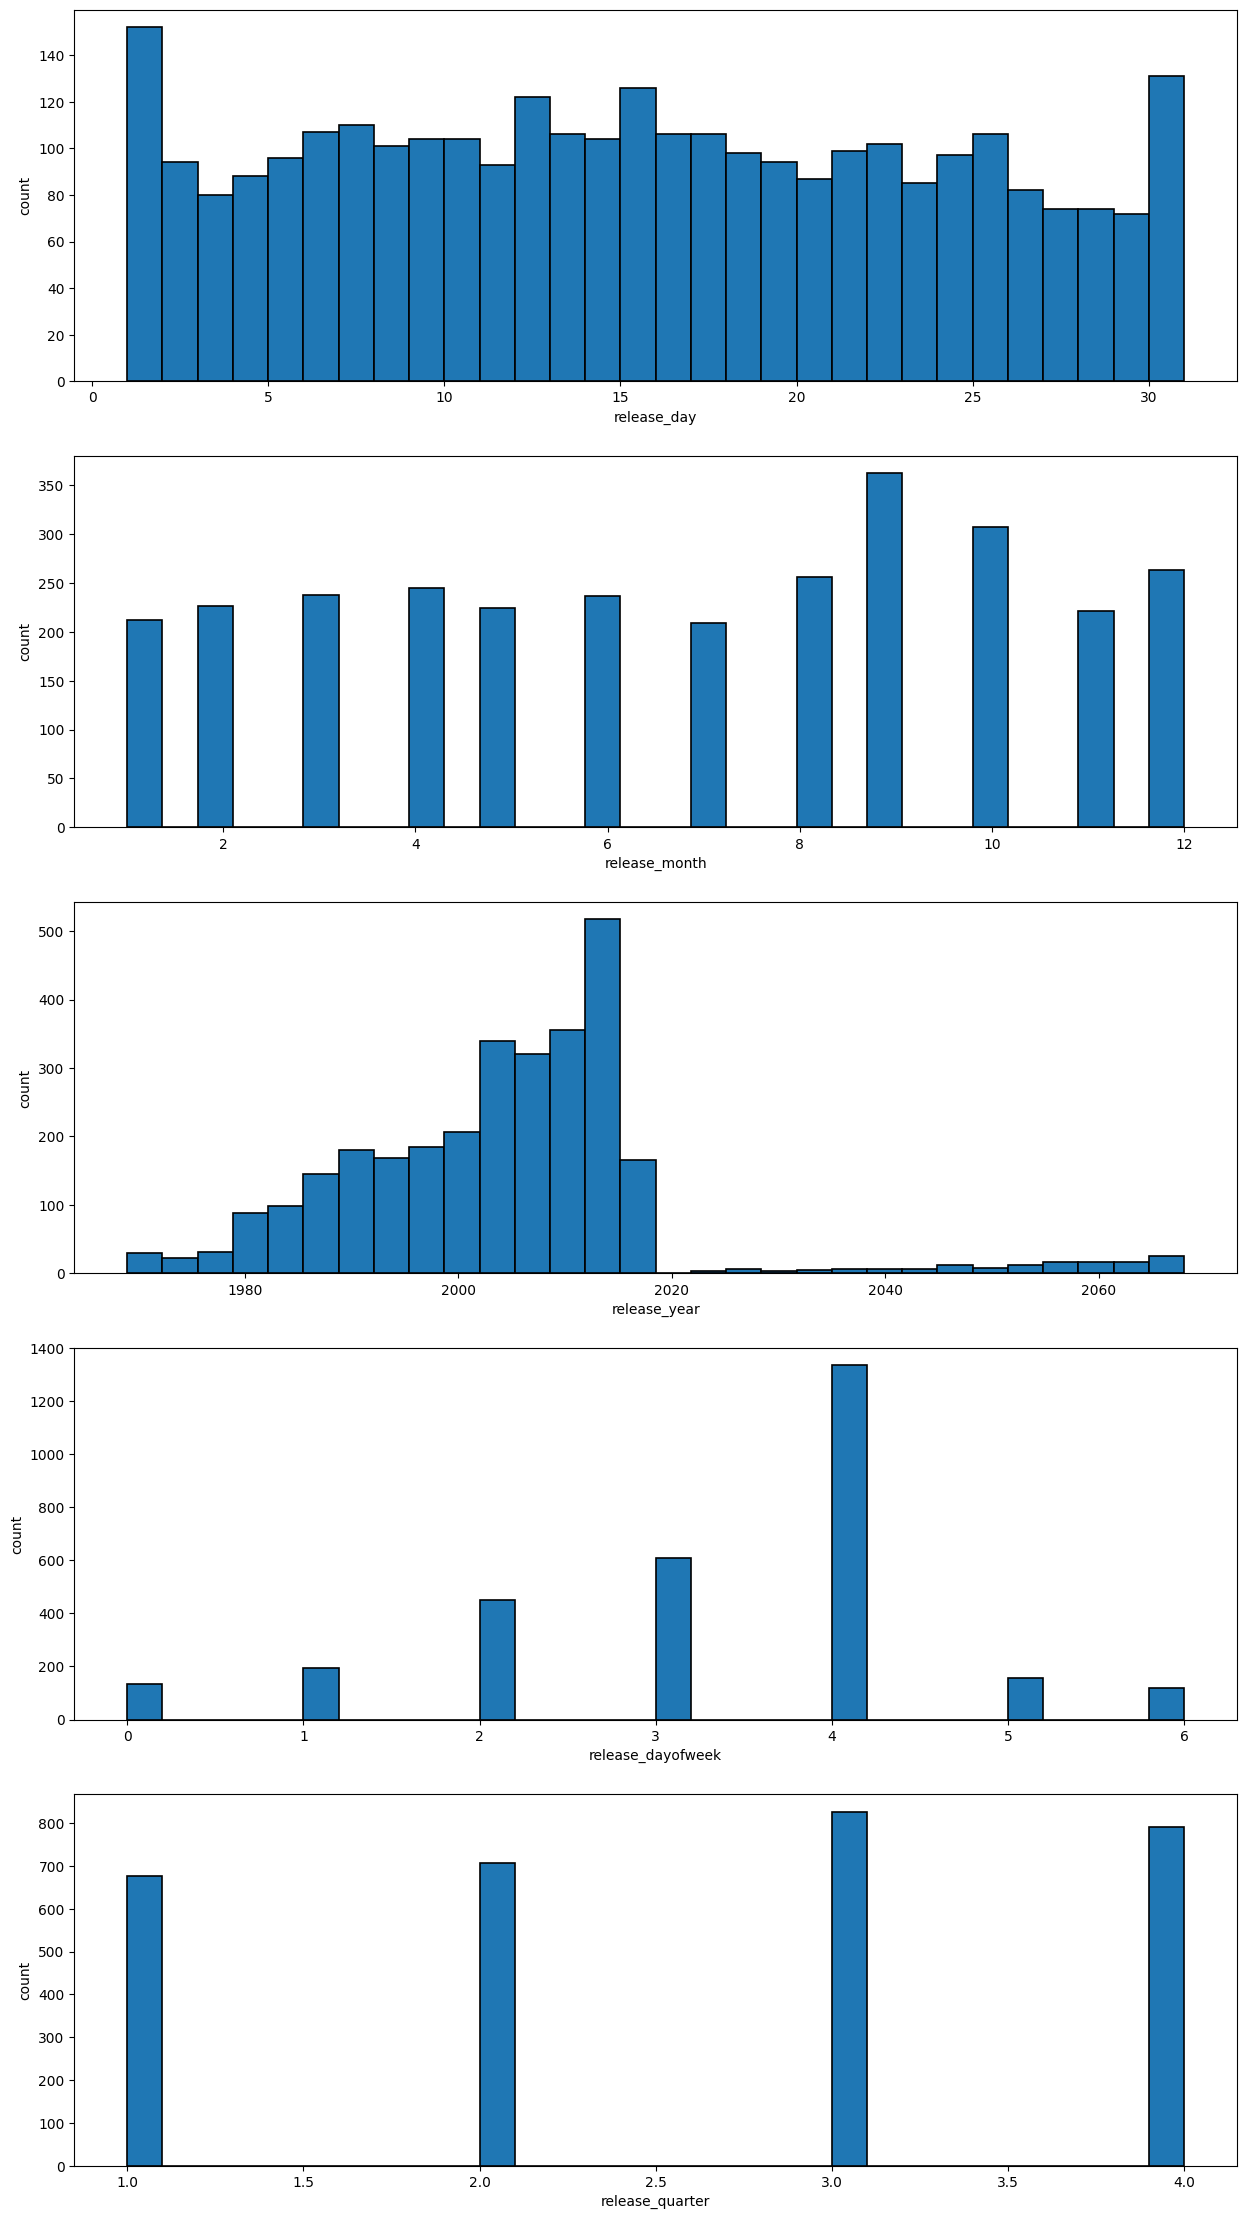

In [24]:
nrows = 5
ncols = 1
fig = plt.figure(figsize=(15, 28))
for i, col in enumerate(df[time_columns]):
    fig.add_subplot(nrows, ncols, i + 1)
    plt.hist(data=df[time_columns], x=col, bins=30, edgecolor='black', linewidth=1.2)
    plt.xlabel(col)
    plt.ylabel("count")
#plt.savefig('fig1.png', bbox_inches='tight')
plt.show()

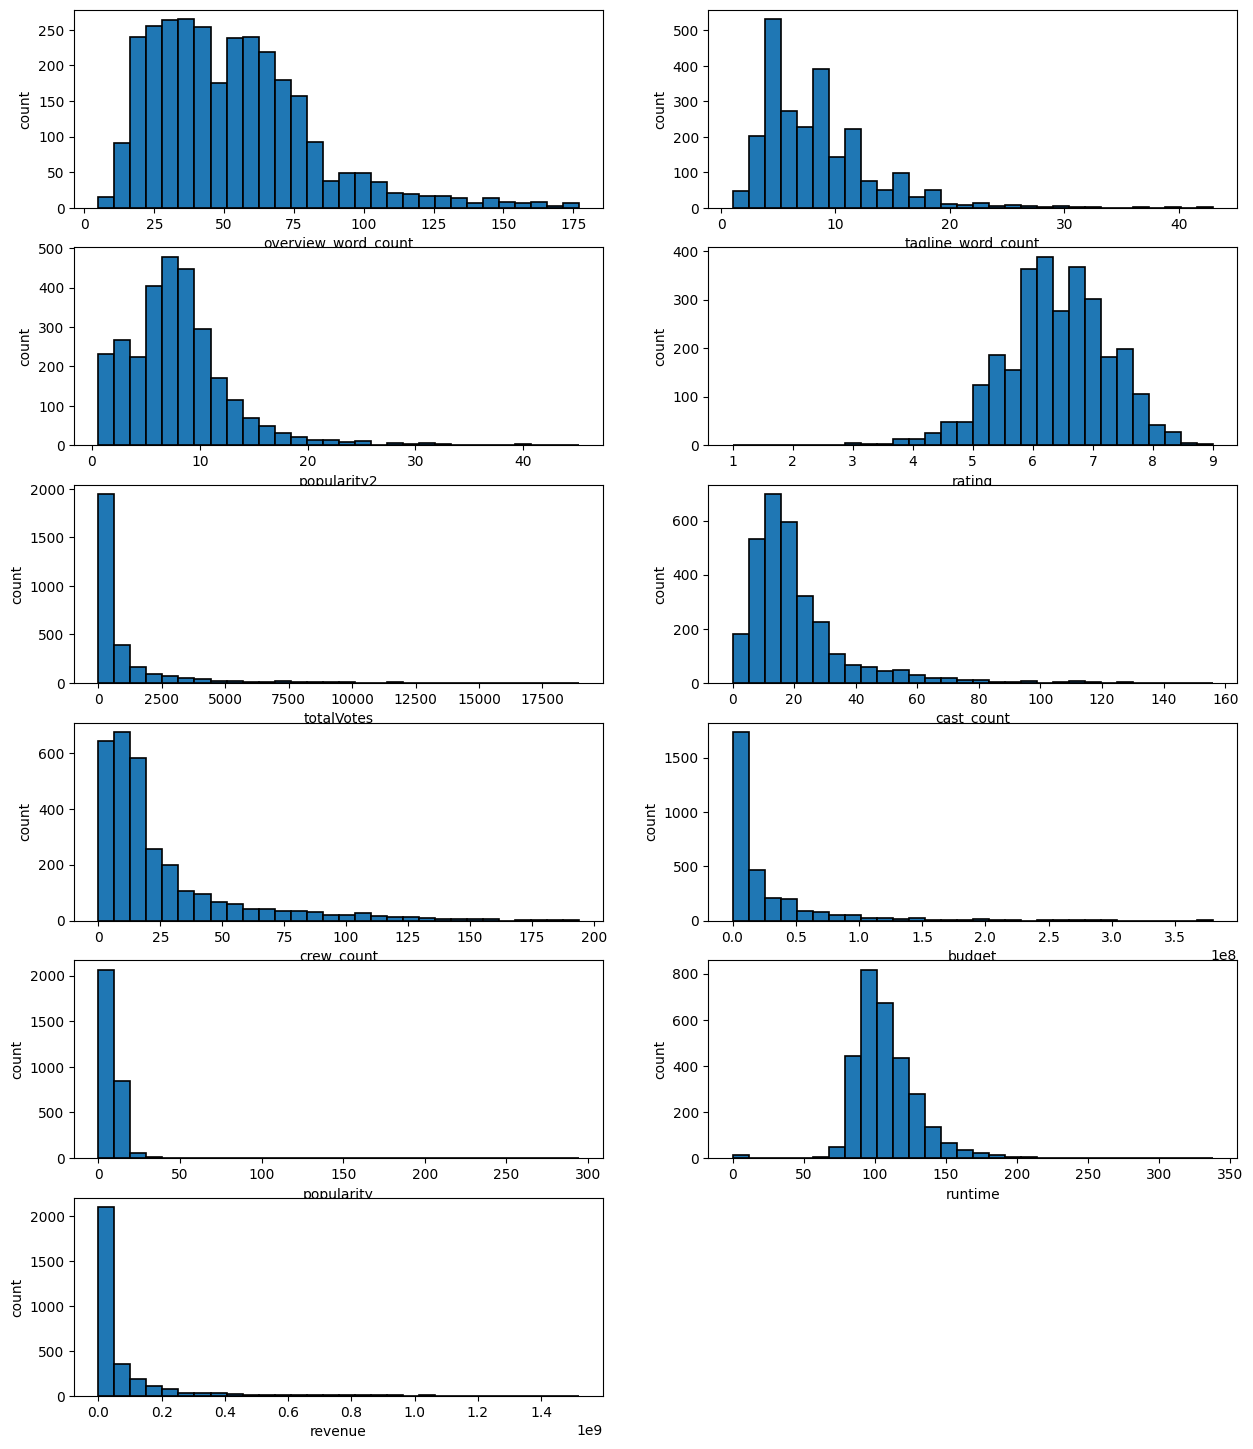

In [25]:
nrows = 6
ncols = 2
fig = plt.figure(figsize=(15, 18))
for i, col in enumerate(df[num_columns]):
    fig.add_subplot(nrows, ncols, i + 1)
    plt.hist(data=df[num_columns], x=col, bins=30, edgecolor='black', linewidth=1.2)
    plt.xlabel(col)
    plt.ylabel("count")
#plt.savefig('fig1.png', bbox_inches='tight')
plt.show()

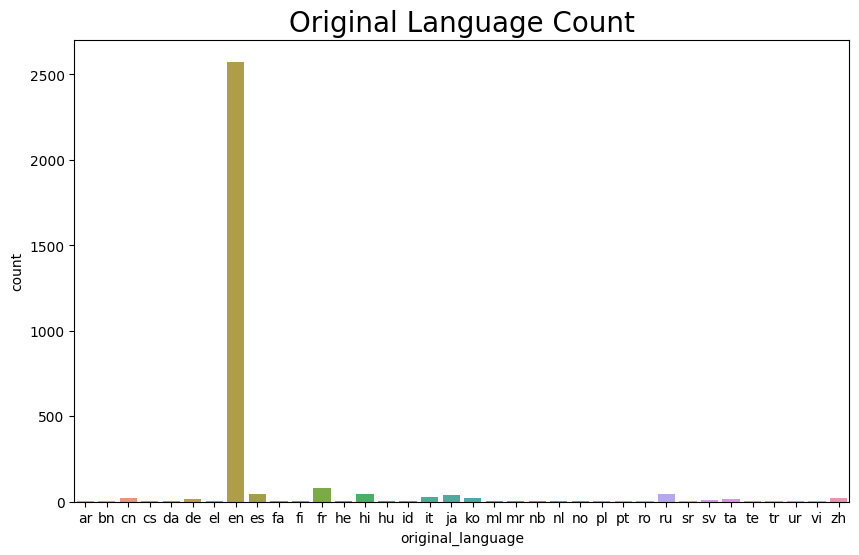

In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(x='original_language', data=df.sort_values('original_language'))
plt.title("Original Language Count", fontsize=20)
#plt.savefig('fig1.png', bbox_inches='tight')
plt.show()

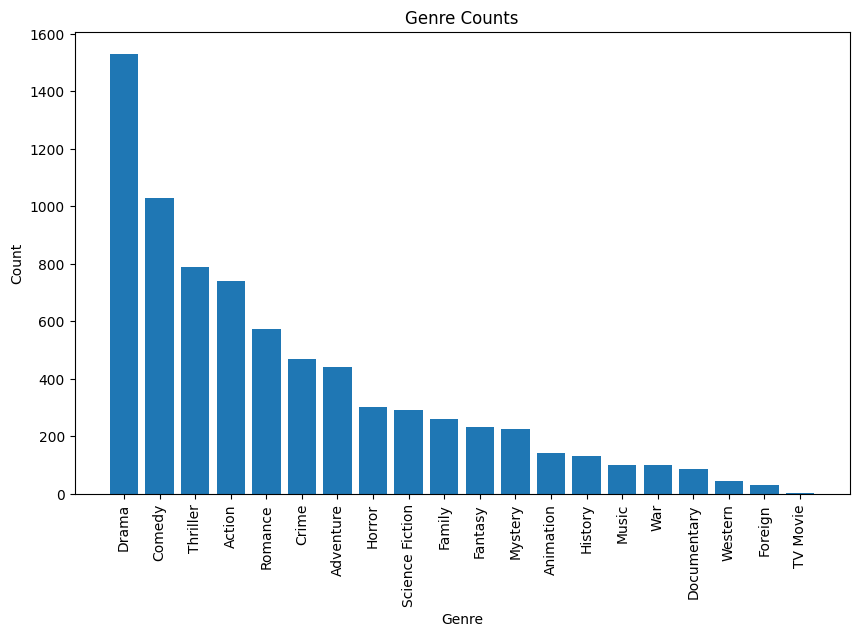

In [27]:
dummy_genre = pd.get_dummies(df['genre_names'].apply(pd.Series).stack()).sum(level=0)
dummy_genre = pd.DataFrame(dummy_genre)
genre_counts = dummy_genre.sum().sort_values(ascending=False)
genres = genre_counts.keys()
counts = genre_counts.values
plt.figure(figsize=(10, 6))
plt.bar(genres, counts)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title('Genre Counts')
plt.show()

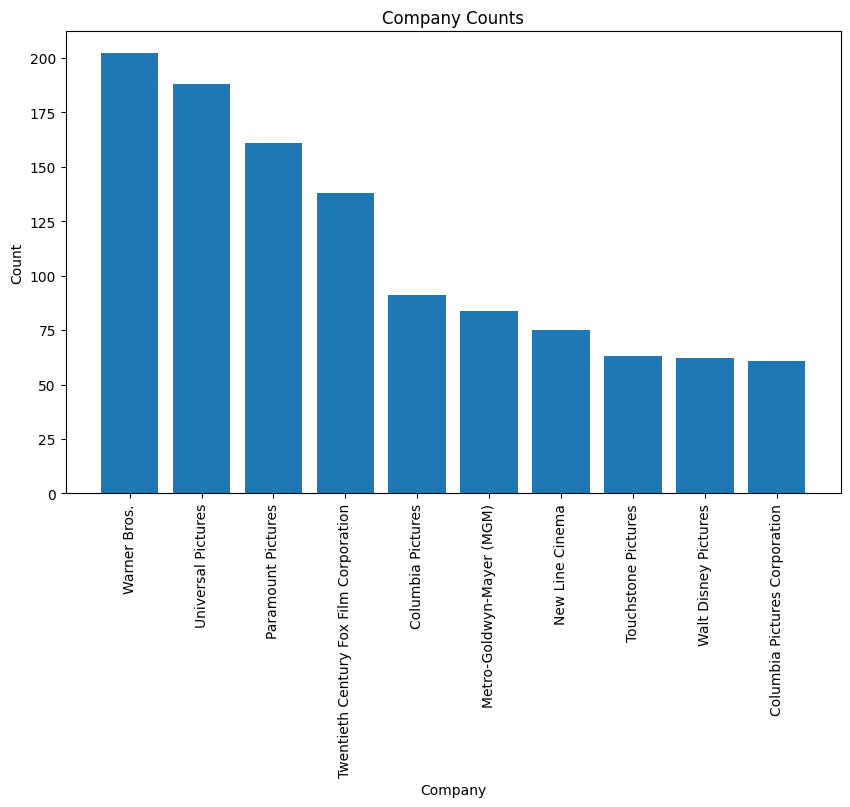

In [28]:
dummy_production_companies = pd.get_dummies(df['production_companies_names'].apply(pd.Series).stack()).sum(level=0)
dummy_production_companies = pd.DataFrame(dummy_production_companies)
production_companies_counts = dummy_production_companies.sum().sort_values(ascending=False)[:10]
production_companies = production_companies_counts.keys()
counts = production_companies_counts.values
plt.figure(figsize=(10, 6))
plt.bar(production_companies, counts)
plt.xlabel('Company')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title('Company Counts')
plt.show()

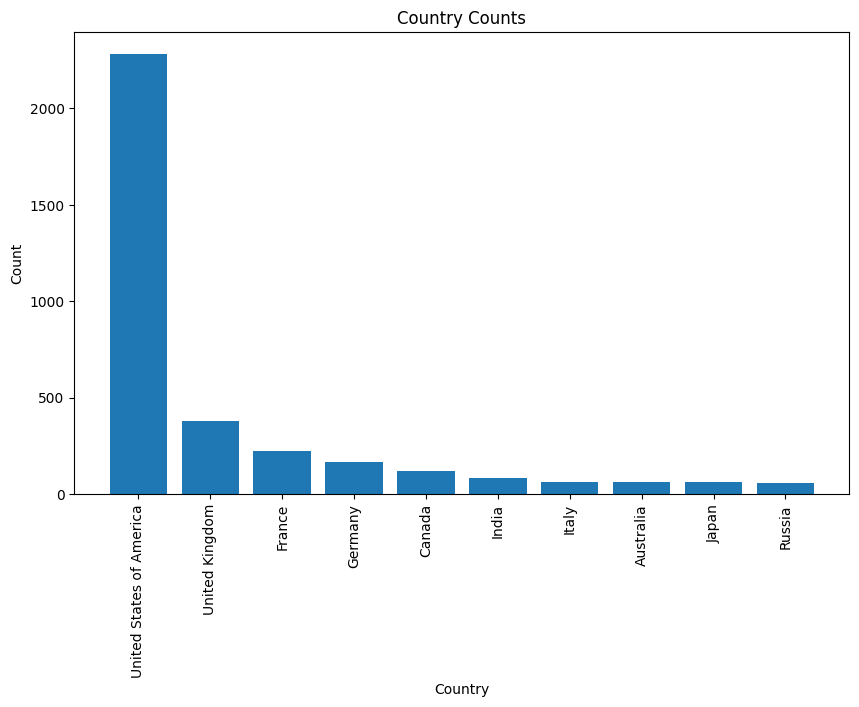

In [29]:
dummy_production_countries = pd.get_dummies(df['production_countries_names'].apply(pd.Series).stack()).sum(level=0)
dummy_production_countries = pd.DataFrame(dummy_production_countries)
production_countries_counts = dummy_production_countries.sum().sort_values(ascending=False)[:10]
production_countries = production_countries_counts.keys()
counts = production_countries_counts.values
plt.figure(figsize=(10, 6))
plt.bar(production_countries, counts)
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title('Country Counts')
plt.show()

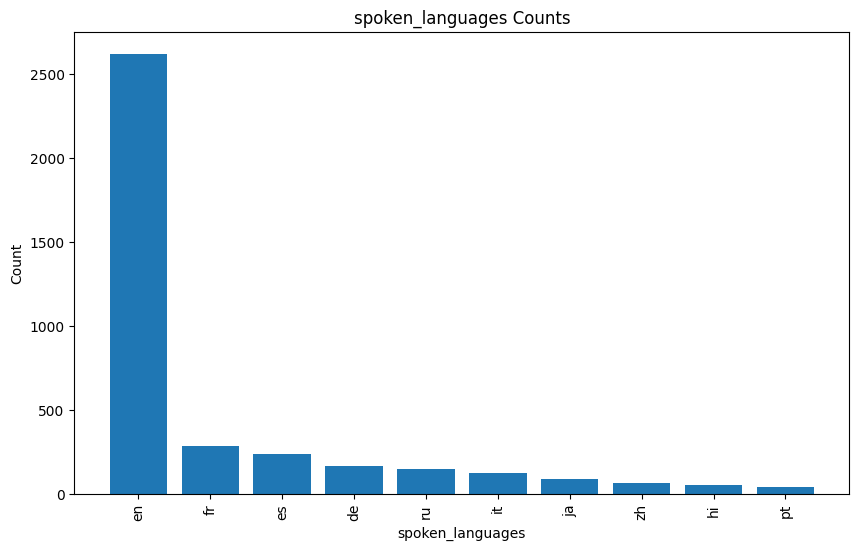

In [30]:
dummy_spoken_languages = pd.get_dummies(df['spoken_languages_tag'].apply(pd.Series).stack()).sum(level=0)
dummy_spoken_languages = pd.DataFrame(dummy_spoken_languages)
spoken_languages_counts = dummy_spoken_languages.sum().sort_values(ascending=False)[:10]
spoken_languages = spoken_languages_counts.keys()
counts = spoken_languages_counts.values
plt.figure(figsize=(10, 6))
plt.bar(spoken_languages, counts)
plt.xlabel('spoken_languages')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title('spoken_languages Counts')
plt.show()

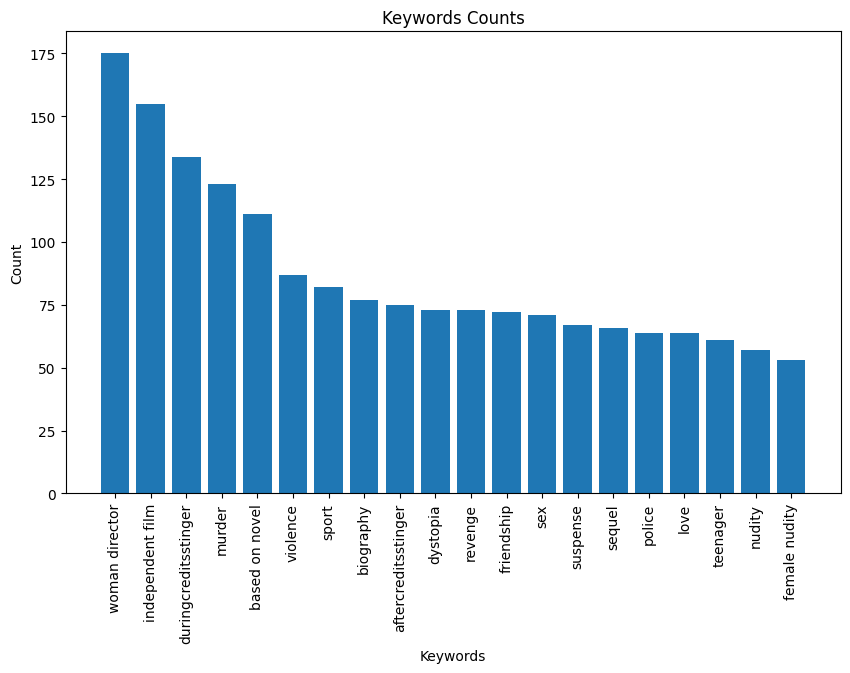

In [31]:
dummy_Keywords = pd.get_dummies(df['Keywords_tag'].apply(pd.Series).stack()).sum(level=0)
dummy_Keywords = pd.DataFrame(dummy_Keywords)
Keywords_counts = dummy_Keywords.sum().sort_values(ascending=False)[:20]
Keywords = Keywords_counts.keys()
counts = Keywords_counts.values
plt.figure(figsize=(10, 6))
plt.bar(Keywords, counts)
plt.xlabel('Keywords')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title('Keywords Counts')
plt.show()

##### **2.2.3.2. Phân tích 2 biến**

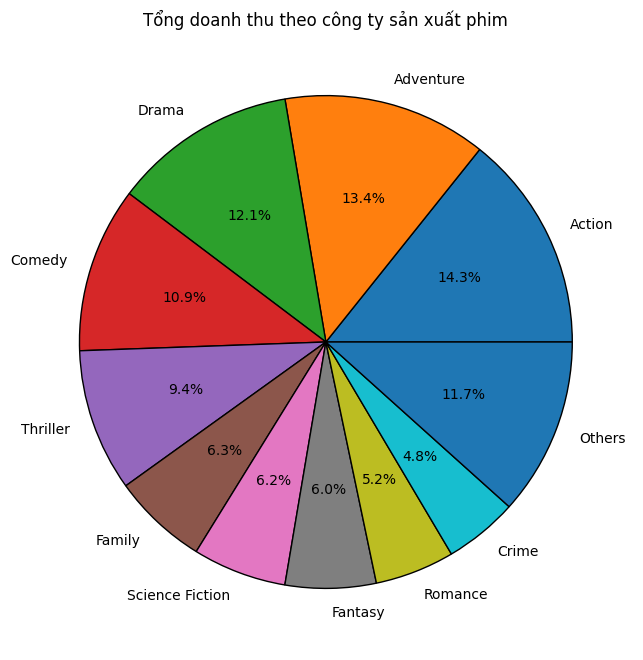

In [32]:
dummy_genre["revenue"] = df["revenue"]
genre_revennue = pd.DataFrame()
genres = []
revenues = []
for genre in dummy_genre[:-1]:
    revenue = dummy_genre[genre] * dummy_genre['revenue']
    genres.append(genre)
    revenues.append(revenue.sum())

genre_revennue["genre"] = genres
genre_revennue["revenue"] = revenues
genre_revennue = genre_revennue[:-1].sort_values(by="revenue", ascending=False).reset_index(drop=True)
revennue_by_genre = genre_revennue.loc[:9, "genre":"revenue"]
revennue_by_genre.loc[len(revennue_by_genre.index)] = ['Others', genre_revennue['revenue'][10:].sum()]

plt.figure(figsize=(10,8))
plt.pie(revennue_by_genre.loc[0:, "revenue"], labels=revennue_by_genre.loc[0:, "genre"], autopct='%1.1f%%', wedgeprops={'linewidth': 1, 'edgecolor': 'black'})
plt.title('Tổng doanh thu theo công ty sản xuất phim')
#plt.savefig('fig1.png', bbox_inches='tight')
plt.show()

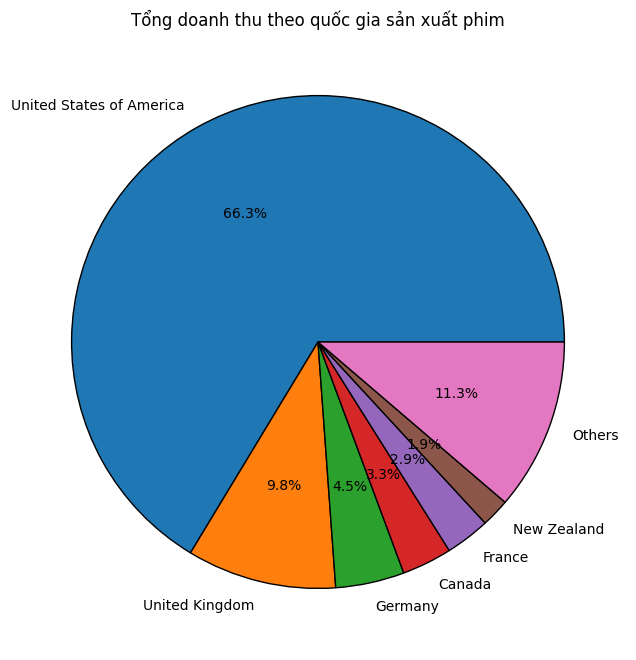

In [33]:
dummy_production_countries["revenue"] = df["revenue"]
countries_revennue = pd.DataFrame()
countries = []
revenues = []
for country in dummy_production_countries[:-1]:
    revenue = dummy_production_countries[country] * dummy_production_countries['revenue']
    countries.append(country)
    revenues.append(revenue.sum())

countries_revennue["country"] = countries
countries_revennue["revenue"] = revenues
countries_revennue = countries_revennue[:-1].sort_values(by="revenue", ascending=False).reset_index(drop=True)
revennue_by_countries = countries_revennue.loc[:5, "country":"revenue"]
revennue_by_countries.loc[len(revennue_by_countries.index)] = ['Others', countries_revennue['revenue'][6:].sum()]

plt.figure(figsize=(10,8))
plt.pie(revennue_by_countries.loc[0:, "revenue"], labels=revennue_by_countries.loc[0:, "country"], autopct='%1.1f%%', wedgeprops={'linewidth': 1, 'edgecolor': 'black'})
plt.title('Tổng doanh thu theo quốc gia sản xuất phim')
#plt.savefig('fig1.png', bbox_inches='tight')
plt.show()

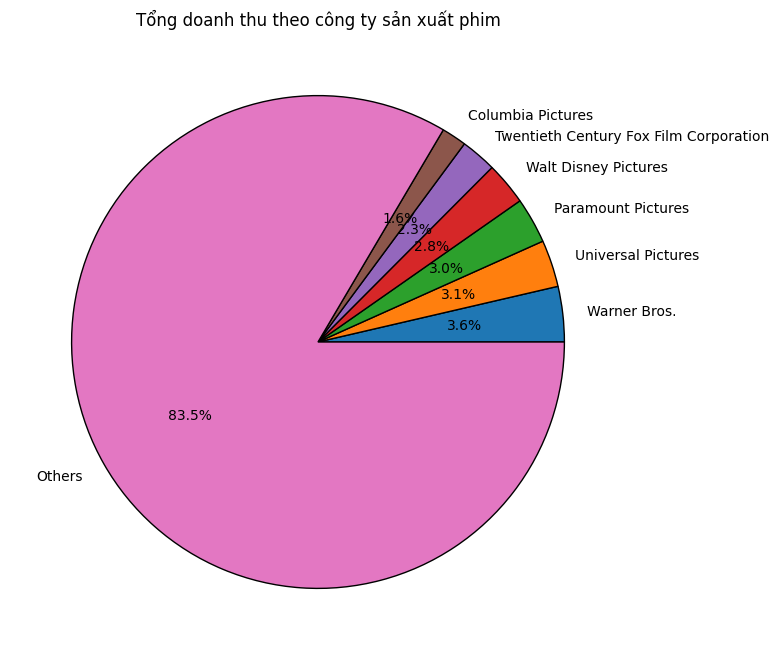

In [34]:
dummy_production_companies["revenue"] = df["revenue"]
companies_revennue = pd.DataFrame()
companies = []
revenues = []
for company in dummy_production_companies[:-1]:
    revenue = dummy_production_companies[company] * dummy_production_companies['revenue']
    companies.append(company)
    revenues.append(revenue.sum())

companies_revennue["company"] = companies
companies_revennue["revenue"] = revenues
companies_revennue = companies_revennue[:-1].sort_values(by="revenue", ascending=False).reset_index(drop=True)
revennue_by_companies = companies_revennue.loc[:5, "company":"revenue"]
revennue_by_companies.loc[len(revennue_by_companies.index)] = ['Others', companies_revennue['revenue'][6:].sum()]

plt.figure(figsize=(10,8))
plt.pie(revennue_by_companies.loc[0:, "revenue"], labels=revennue_by_companies.loc[0:, "company"], autopct='%1.1f%%', wedgeprops={'linewidth': 1, 'edgecolor': 'black'})
plt.title('Tổng doanh thu theo công ty sản xuất phim')
#plt.savefig('fig1.png', bbox_inches='tight')
plt.show()

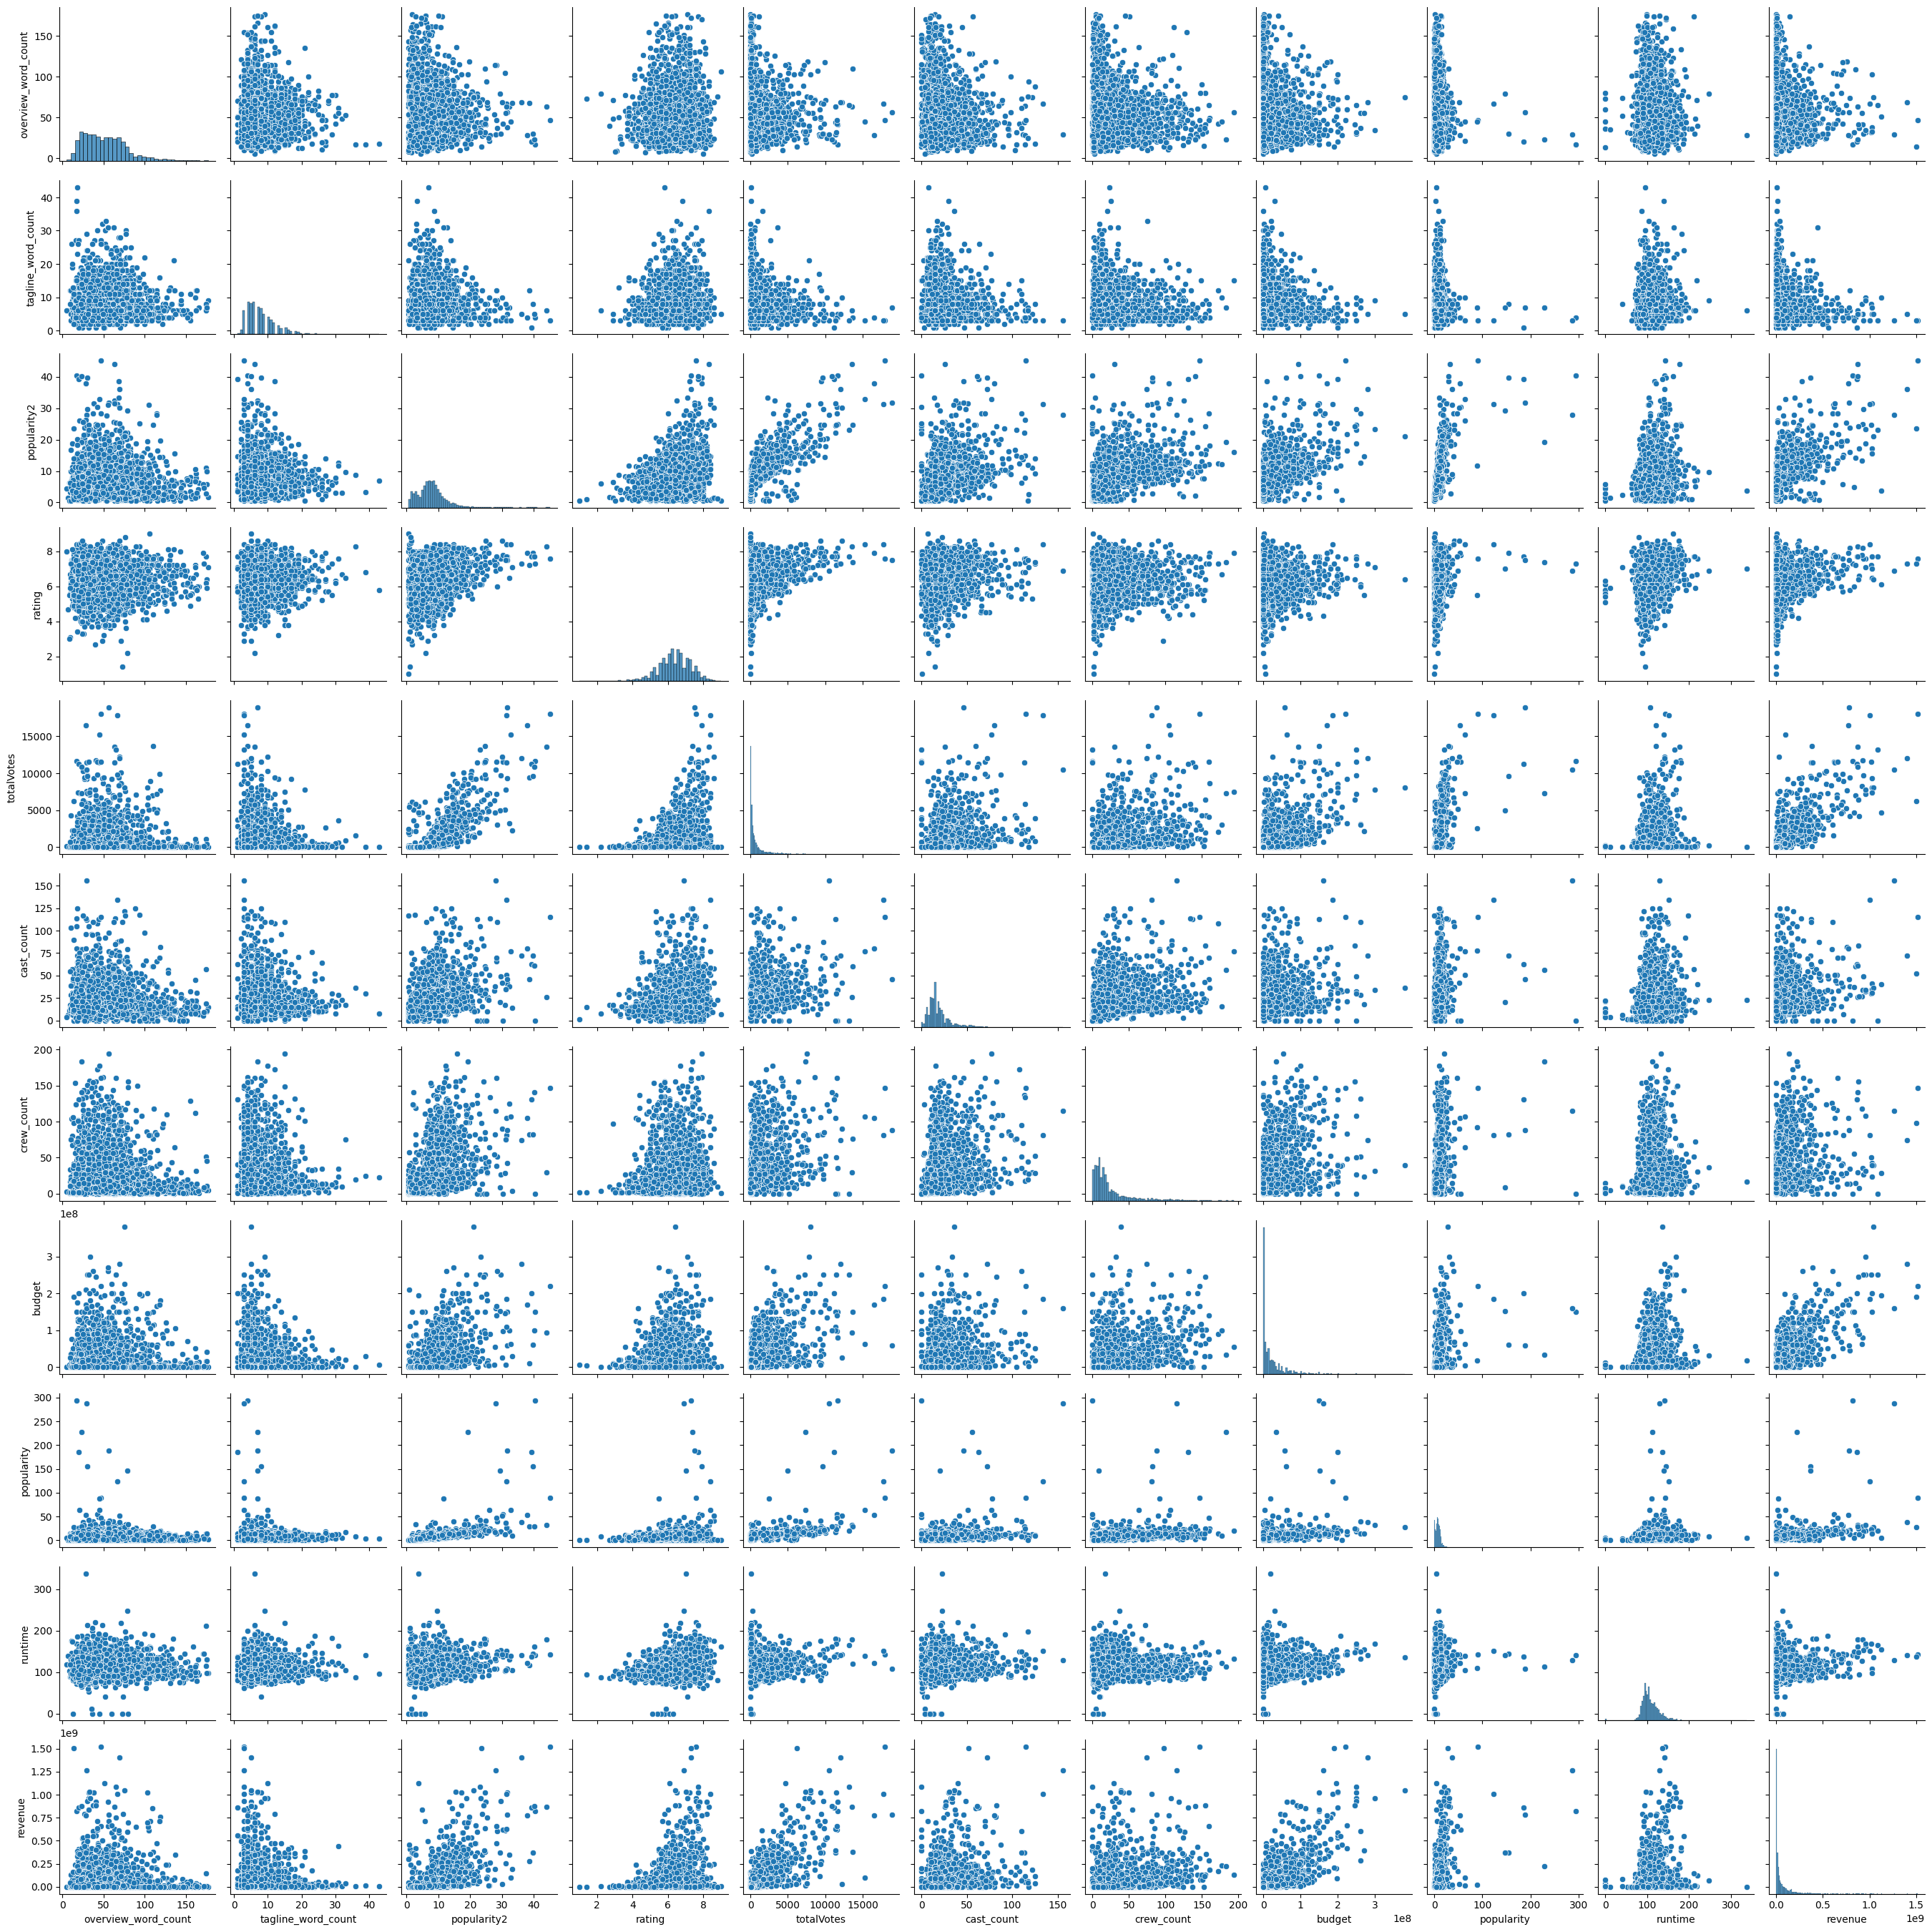

In [35]:
sns.pairplot(data= df[num_columns])
#plt.savefig('fig1.png', bbox_inches='tight')
plt.show()

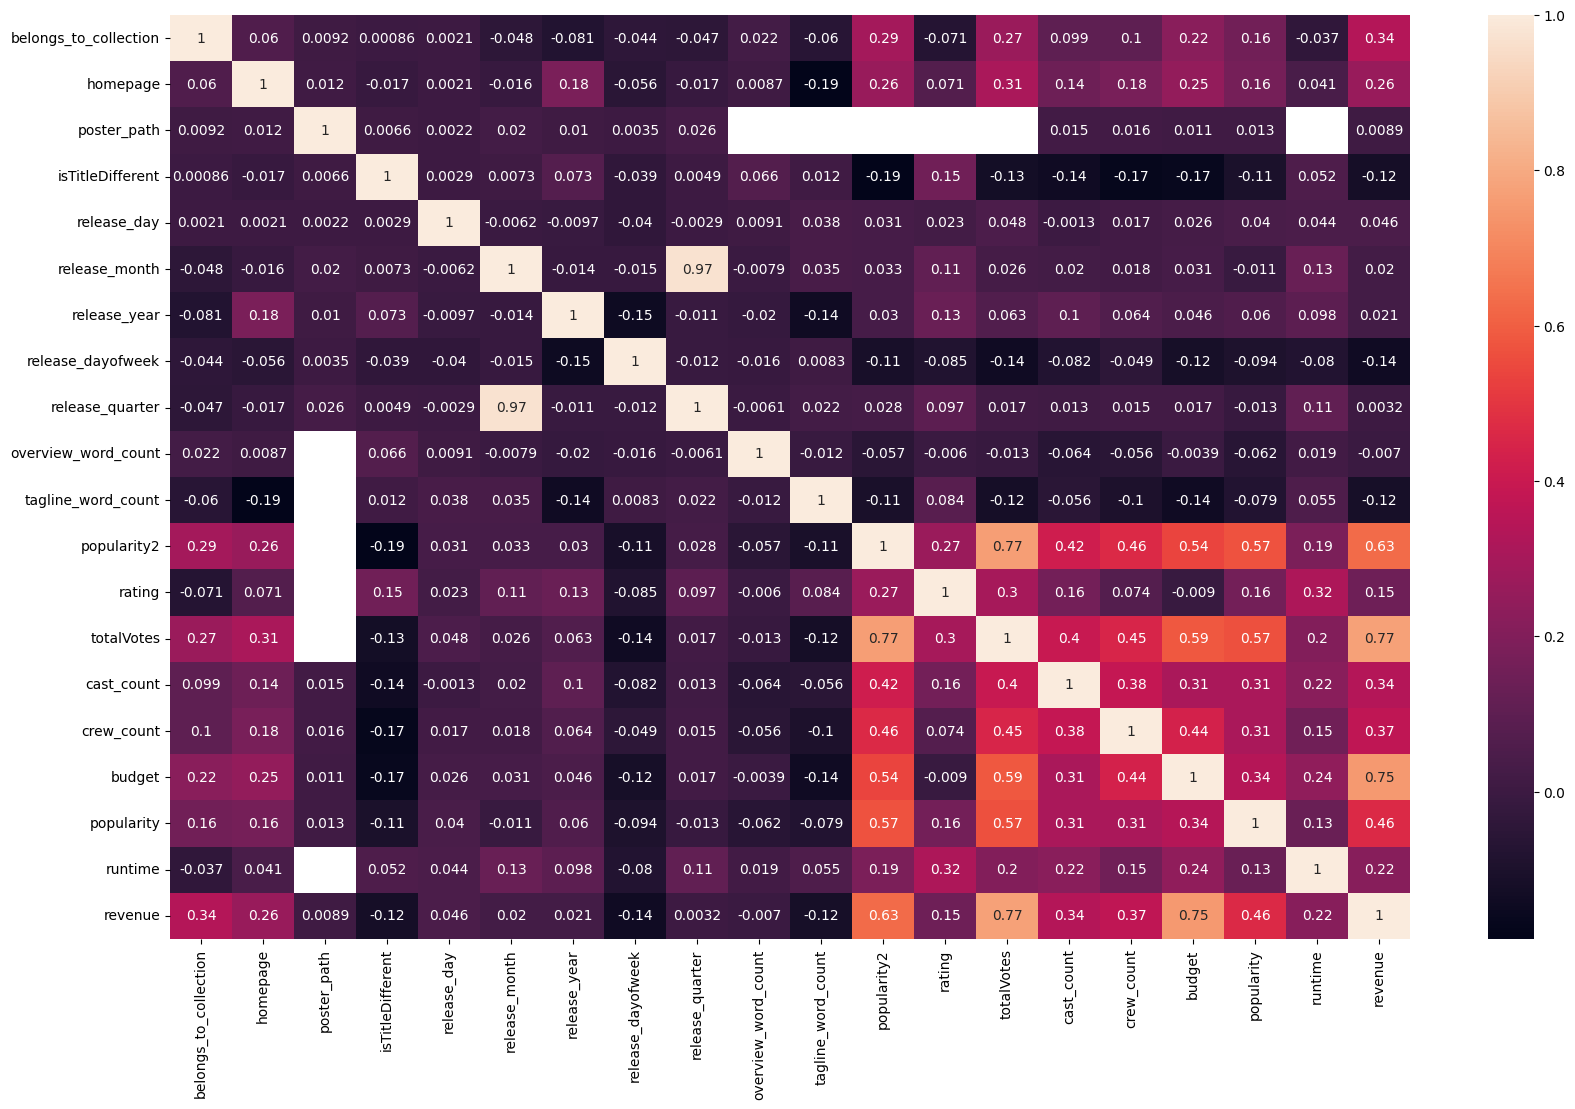

In [36]:
columns = cate_columns + time_columns + num_columns
plt.figure(figsize=(20,12))
corr_matrix = df[columns].corr()
sns.heatmap(corr_matrix, annot=True)
#plt.savefig('fig1.png', bbox_inches='tight')
plt.show()

##### **2.2.3.3. Phân tích đa biến**

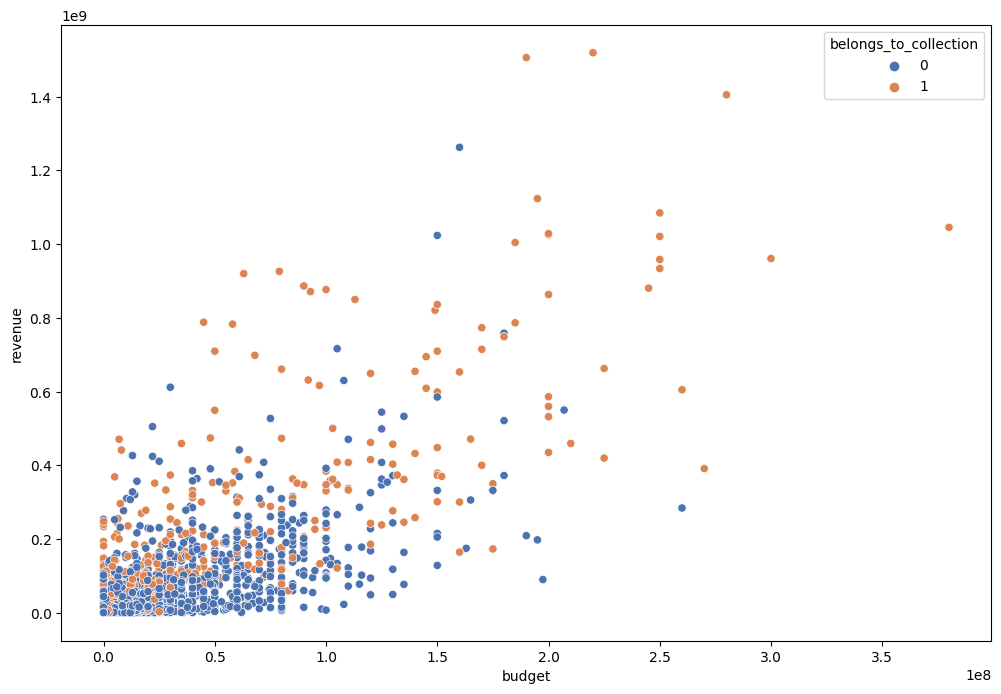

In [37]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(data=df, x='budget', y='revenue', 
                     hue='belongs_to_collection', palette='deep')
#plt.savefig('fig1.png', bbox_inches='tight')
plt.show()

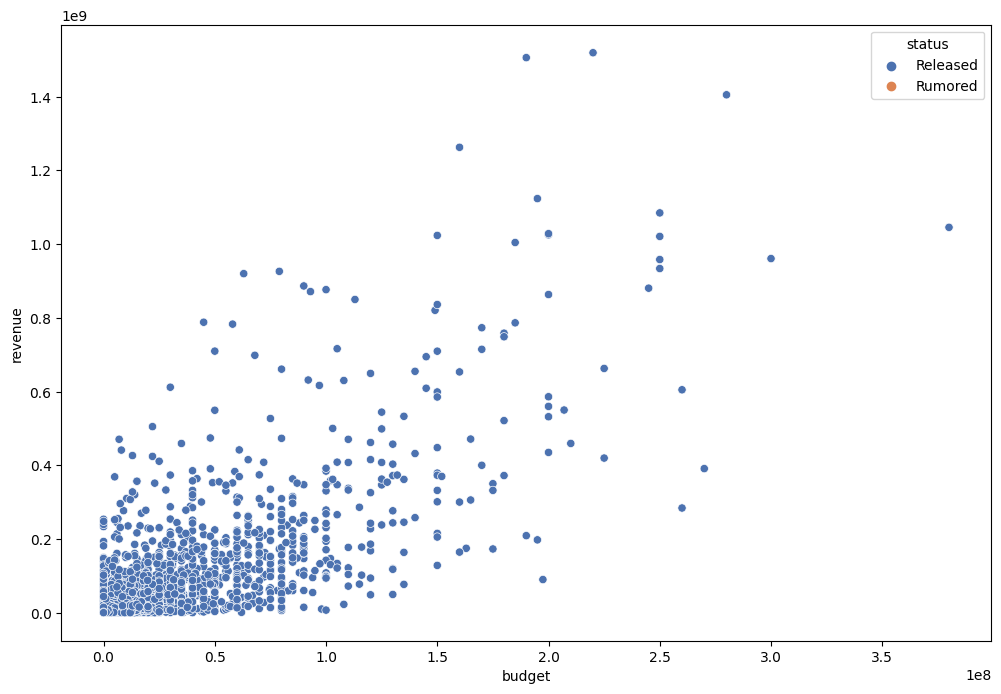

In [38]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(data=df, x='budget', y='revenue', 
                     hue='status', palette='deep')
#plt.savefig('fig1.png', bbox_inches='tight')
plt.show()

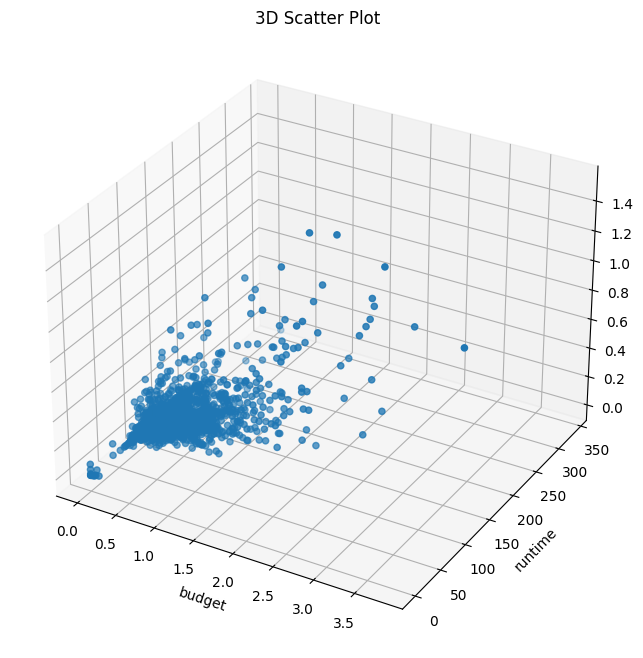

In [39]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df["budget"], df["runtime"], df["revenue"])
ax.set_xlabel('budget')
ax.set_ylabel('runtime')
ax.set_zlabel('revenue')
plt.title('3D Scatter Plot')
#plt.savefig('fig1.png', bbox_inches='tight')
plt.show()

## Giai đoạn 3:

### 3.1. Rút trích đặc trưng

- Những thuộc tính ta chọn cho bộ dữ liệu:
  + 
  + 
  

In [40]:
train = pd.read_csv("train.csv", encoding='utf-8')
AdditionalFeatures = pd.read_csv('TrainAdditionalFeatures.csv', encoding='utf-8')
train = pd.merge(train, AdditionalFeatures, how='left', on=['imdb_id'])
train.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue',
       'popularity2', 'rating', 'totalVotes'],
      dtype='object')

In [41]:
train = pd.read_csv("train.csv", encoding='utf-8')
AdditionalFeatures = pd.read_csv('TrainAdditionalFeatures.csv', encoding='utf-8')
train = pd.merge(train, AdditionalFeatures, how='left', on=['imdb_id'])

test = pd.read_csv("test.csv", encoding='utf-8')
AdditionalFeatures = pd.read_csv('TestAdditionalFeatures.csv', encoding='utf-8')
test = pd.merge(test, AdditionalFeatures, how='left', on=['imdb_id'])

test.loc[test['id'] == 3033,'budget'] = 250 
test.loc[test['id'] == 3051,'budget'] = 50
test.loc[test['id'] == 3084,'budget'] = 337
test.loc[test['id'] == 3224,'budget'] = 4  
test.loc[test['id'] == 3594,'budget'] = 25  
test.loc[test['id'] == 3619,'budget'] = 500  
test.loc[test['id'] == 3831,'budget'] = 3  
test.loc[test['id'] == 3935,'budget'] = 500  
test.loc[test['id'] == 4049,'budget'] = 995946 
test.loc[test['id'] == 4424,'budget'] = 3  
test.loc[test['id'] == 4460,'budget'] = 8  
test.loc[test['id'] == 4555,'budget'] = 1200000 
test.loc[test['id'] == 4624,'budget'] = 30 
test.loc[test['id'] == 4645,'budget'] = 500 
test.loc[test['id'] == 4709,'budget'] = 450 
test.loc[test['id'] == 4839,'budget'] = 7
test.loc[test['id'] == 3125,'budget'] = 25 
test.loc[test['id'] == 3142,'budget'] = 1
test.loc[test['id'] == 3201,'budget'] = 450
test.loc[test['id'] == 3222,'budget'] = 6
test.loc[test['id'] == 3545,'budget'] = 38
test.loc[test['id'] == 3670,'budget'] = 18
test.loc[test['id'] == 3792,'budget'] = 19
test.loc[test['id'] == 3881,'budget'] = 7
test.loc[test['id'] == 3969,'budget'] = 400
test.loc[test['id'] == 4196,'budget'] = 6
test.loc[test['id'] == 4221,'budget'] = 11
test.loc[test['id'] == 4222,'budget'] = 500
test.loc[test['id'] == 4285,'budget'] = 11
test.loc[test['id'] == 4319,'budget'] = 1
test.loc[test['id'] == 4639,'budget'] = 10
test.loc[test['id'] == 4719,'budget'] = 45
test.loc[test['id'] == 4822,'budget'] = 22
test.loc[test['id'] == 4829,'budget'] = 20
test.loc[test['id'] == 4969,'budget'] = 20
test.loc[test['id'] == 5021,'budget'] = 40 
test.loc[test['id'] == 5035,'budget'] = 1 
test.loc[test['id'] == 5063,'budget'] = 14 
test.loc[test['id'] == 5119,'budget'] = 2 
test.loc[test['id'] == 5214,'budget'] = 30 
test.loc[test['id'] == 5221,'budget'] = 50 
test.loc[test['id'] == 4903,'budget'] = 15
test.loc[test['id'] == 4983,'budget'] = 3
test.loc[test['id'] == 5102,'budget'] = 28
test.loc[test['id'] == 5217,'budget'] = 75
test.loc[test['id'] == 5224,'budget'] = 3 
test.loc[test['id'] == 5469,'budget'] = 20 
test.loc[test['id'] == 5840,'budget'] = 1 
test.loc[test['id'] == 5960,'budget'] = 30
test.loc[test['id'] == 6506,'budget'] = 11 
test.loc[test['id'] == 6553,'budget'] = 280
test.loc[test['id'] == 6561,'budget'] = 7
test.loc[test['id'] == 6582,'budget'] = 218
test.loc[test['id'] == 6638,'budget'] = 5
test.loc[test['id'] == 6749,'budget'] = 8 
test.loc[test['id'] == 6759,'budget'] = 50 
test.loc[test['id'] == 6856,'budget'] = 10
test.loc[test['id'] == 6858,'budget'] =  100
test.loc[test['id'] == 6876,'budget'] =  250
test.loc[test['id'] == 6972,'budget'] = 1
test.loc[test['id'] == 7079,'budget'] = 8000000
test.loc[test['id'] == 7150,'budget'] = 118
test.loc[test['id'] == 6506,'budget'] = 118
test.loc[test['id'] == 7225,'budget'] = 6
test.loc[test['id'] == 7231,'budget'] = 85
test.loc[test['id'] == 5222,'budget'] = 5
test.loc[test['id'] == 5322,'budget'] = 90
test.loc[test['id'] == 5350,'budget'] = 70
test.loc[test['id'] == 5378,'budget'] = 10
test.loc[test['id'] == 5545,'budget'] = 80
test.loc[test['id'] == 5810,'budget'] = 8
test.loc[test['id'] == 5926,'budget'] = 300
test.loc[test['id'] == 5927,'budget'] = 4
test.loc[test['id'] == 5986,'budget'] = 1
test.loc[test['id'] == 6053,'budget'] = 20
test.loc[test['id'] == 6104,'budget'] = 1
test.loc[test['id'] == 6130,'budget'] = 30
test.loc[test['id'] == 6301,'budget'] = 150
test.loc[test['id'] == 6276,'budget'] = 100
test.loc[test['id'] == 6473,'budget'] = 100
test.loc[test['id'] == 6842,'budget'] = 30

train.loc[train['id'] == 90,'budget'] = 30000000                  
train.loc[train['id'] == 118,'budget'] = 60000000       
train.loc[train['id'] == 149,'budget'] = 18000000       
train.loc[train['id'] == 464,'budget'] = 20000000       
train.loc[train['id'] == 470,'budget'] = 13000000       
train.loc[train['id'] == 513,'budget'] = 930000         
train.loc[train['id'] == 797,'budget'] = 8000000        
train.loc[train['id'] == 819,'budget'] = 90000000       
train.loc[train['id'] == 850,'budget'] = 90000000       
train.loc[train['id'] == 1007,'budget'] = 2              
train.loc[train['id'] == 1112,'budget'] = 7500000       
train.loc[train['id'] == 1131,'budget'] = 4300000        
train.loc[train['id'] == 1359,'budget'] = 10000000       
train.loc[train['id'] == 1542,'budget'] = 1             
train.loc[train['id'] == 1570,'budget'] = 15800000       
train.loc[train['id'] == 1571,'budget'] = 4000000        
train.loc[train['id'] == 1714,'budget'] = 46000000       
train.loc[train['id'] == 1721,'budget'] = 17500000       
train.loc[train['id'] == 1885,'budget'] = 12             
train.loc[train['id'] == 2091,'budget'] = 10             
train.loc[train['id'] == 2268,'budget'] = 17500000       
train.loc[train['id'] == 2491,'budget'] = 6              
train.loc[train['id'] == 2602,'budget'] = 31000000       
train.loc[train['id'] == 2612,'budget'] = 15000000       
train.loc[train['id'] == 2696,'budget'] = 10000000      
train.loc[train['id'] == 2801,'budget'] = 10000000       
train.loc[train['id'] == 335,'budget'] = 2 
train.loc[train['id'] == 348,'budget'] = 12
train.loc[train['id'] == 470,'budget'] = 13000000 
train.loc[train['id'] == 513,'budget'] = 1100000
train.loc[train['id'] == 640,'budget'] = 6 
train.loc[train['id'] == 696,'budget'] = 1
train.loc[train['id'] == 797,'budget'] = 8000000 
train.loc[train['id'] == 850,'budget'] = 1500000
train.loc[train['id'] == 1199,'budget'] = 5 
train.loc[train['id'] == 1282,'budget'] = 9              
train.loc[train['id'] == 1347,'budget'] = 1
train.loc[train['id'] == 1755,'budget'] = 2
train.loc[train['id'] == 1801,'budget'] = 5
train.loc[train['id'] == 1918,'budget'] = 592 
train.loc[train['id'] == 2033,'budget'] = 4
train.loc[train['id'] == 2118,'budget'] = 344 
train.loc[train['id'] == 2252,'budget'] = 130
train.loc[train['id'] == 2256,'budget'] = 1 
train.loc[train['id'] == 2696,'budget'] = 10000000

test["revenue"] = np.nan

In [42]:
merged_df = pd.concat([train, test], axis=0)
merged_df = merged_df.reset_index(drop=True)

In [43]:
dict_columns = ["belongs_to_collection", "genres", "production_companies", "production_countries", 
                "spoken_languages", "Keywords", "cast", "crew"]
text_to_dict(merged_df, dict_columns)

merged_df['belongs_to_collection'] = merged_df['belongs_to_collection'].apply(lambda x: len(x) if x != {} else 0)

list_of_genres = list(merged_df['genres'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
merged_df['num_genres'] = merged_df['genres'].apply(lambda x: len(x) if x != {} else 0)
merged_df['all_genres'] = merged_df['genres'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
top_genres = [m for m in [i for j in list_of_genres for i in j]]
for g in top_genres:
    merged_df['genre_' + g] = merged_df['all_genres'].apply(lambda x: 1 if g in x else 0)

merged_df["homepage"] = merged_df["homepage"].notnull().astype(int)

merged_df['words_original_title'] = merged_df['original_title'].fillna('').apply(lambda x: len((x.split(" "))))
merged_df['isTitleDifferent'] = 1
merged_df.loc[merged_df['original_title'] == merged_df['title'] ,"isTitleDifferent"] = 0

merged_df['overview'] = merged_df['overview'].fillna('').apply(lambda x: len((x.split(" "))))

merged_df["poster_path"] = merged_df["poster_path"].notnull().astype(int)

list_of_companies = list(merged_df['production_companies'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
merged_df['num_companies'] = merged_df['production_companies'].apply(lambda x: len(x) if x != {} else 0)
merged_df['all_production_companies'] = merged_df['production_companies'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
top_companies = [m[0] for m in Counter([i for j in list_of_companies for i in j]).most_common(20)]
for g in top_companies:
    merged_df['production_company_' + g] = merged_df['all_production_companies'].apply(lambda x: 1 if g in x else 0)

list_of_countries = list(merged_df['production_countries'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
merged_df['num_countries'] = merged_df['production_countries'].apply(lambda x: len(x) if x != {} else 0)
merged_df['all_countries'] = merged_df['production_countries'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
top_countries = [m[0] for m in Counter([i for j in list_of_countries for i in j]).most_common(30)]
for g in top_countries:
    merged_df['production_country_' + g] = merged_df['all_countries'].apply(lambda x: 1 if g in x else 0)

merged_df["release_date"] = pd.to_datetime(merged_df["release_date"], format="%m/%d/%y")
merged_df["release_day"] = merged_df["release_date"].apply(lambda x: x.day)
merged_df["release_month"] = merged_df["release_date"].apply(lambda x: x.month)
merged_df["release_year"] = merged_df["release_date"].apply(lambda x: x.year)
merged_df['release_dayofweek'] = merged_df["release_date"].dt.dayofweek
merged_df['release_quarter'] = merged_df["release_date"].dt.quarter

list_of_languages = list(merged_df['spoken_languages'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
merged_df['num_languages'] = merged_df['spoken_languages'].apply(lambda x: len(x) if x != {} else 0)
merged_df['all_languages'] = merged_df['spoken_languages'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
top_languages = [m[0] for m in Counter([i for j in list_of_languages for i in j]).most_common(30)]
for g in top_languages:
    merged_df['language_' + g] = merged_df['all_languages'].apply(lambda x: 1 if g in x else 0)

merged_df['tagline'] = merged_df['tagline'].fillna('').apply(lambda x: len((x.split(" "))))
merged_df['title'] = merged_df['title'].fillna('').apply(lambda x: len((x.split(" "))))

list_of_keywords = list(merged_df['Keywords'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
merged_df['num_Keywords'] = merged_df['Keywords'].apply(lambda x: len(x) if x != {} else 0)
merged_df['all_Keywords'] = merged_df['Keywords'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
top_keywords = [m[0] for m in Counter([i for j in list_of_keywords for i in j]).most_common(30)]
for g in top_keywords:
    merged_df['keyword_' + g] = merged_df['all_Keywords'].apply(lambda x: 1 if g in x else 0)

list_of_cast_names = list(merged_df['cast'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
list_of_cast_characters = list(merged_df['cast'].apply(lambda x: [i['character'] for i in x] if x != {} else []).values)
merged_df['num_cast'] = merged_df['cast'].apply(lambda x: len(x) if x != {} else 0)
top_cast_names = [m[0] for m in Counter([i for j in list_of_cast_names for i in j]).most_common(20)]
for g in top_cast_names:
    merged_df['cast_name_' + g] = merged_df['cast'].apply(lambda x: 1 if g in str(x) else 0)

In [44]:
merged_df.shape

(7398, 194)

#### 3.1.1. Giảm chiều dữ liệu.

In [45]:
columns = ["id", "imdb_id", "genres", "all_genres", "original_title", "production_companies", "all_production_companies",
           "production_countries", "all_countries", "release_date", "spoken_languages", "all_languages", "Keywords", 
           "all_Keywords", "status", "cast", "crew", ]
merged_df = merged_df.drop(columns, axis=1)

#### 3.1.2. Xử lí tình trạng khuyết dữ liệu (Missing data).

In [46]:
null_df = pd.DataFrame(merged_df.isnull().sum(), columns=["Số mẫu bị thiếu"])
null_df["Tỉ lệ bị thiếu"] = np.round(merged_df.isnull().sum() / merged_df.shape[0] * 100, 2)
null_df.index.name = "Thuộc tính"
null_df = null_df.sort_values(by="Tỉ lệ bị thiếu", ascending=False)
null_df.loc[null_df["Tỉ lệ bị thiếu"] > 0]

,Số mẫu bị thiếu,Tỉ lệ bị thiếu
Thuộc tính,,
revenue,4398,59.45
totalVotes,297,4.01
popularity2,297,4.01
rating,297,4.01
runtime,6,0.08
release_dayofweek,1,0.01
release_year,1,0.01
release_month,1,0.01
release_day,1,0.01


In [47]:
def replace_by_mean(df, column):
    avg = df[column].astype("float").mean(axis=0)
    df[column].replace(np.nan, avg, inplace=True)

def replace_by_frequent(df, column):
    frequent = df[column].value_counts().idxmax()
    df[column].replace(np.nan, frequent, inplace=True)

replace_by_mean(merged_df, "runtime")
replace_by_mean(merged_df, "popularity2")
replace_by_mean(merged_df, "rating")
replace_by_mean(merged_df, "totalVotes")

replace_by_frequent(merged_df, "release_day")
replace_by_frequent(merged_df, "release_month")
replace_by_frequent(merged_df, "release_year")
replace_by_frequent(merged_df, "release_dayofweek")
replace_by_frequent(merged_df, "release_quarter")

null_df = pd.DataFrame(merged_df.isnull().sum(), columns=["Số mẫu bị thiếu"])
null_df["Tỉ lệ bị thiếu"] = np.round(merged_df.isnull().sum() / merged_df.shape[0] * 100, 2)
null_df.index.name = "Thuộc tính"
null_df = null_df.sort_values(by="Tỉ lệ bị thiếu", ascending=False)
null_df.loc[null_df["Tỉ lệ bị thiếu"] > 0]

,Số mẫu bị thiếu,Tỉ lệ bị thiếu
Thuộc tính,,
revenue,4398,59.45


#### 3.1.3. Số hóa giá trị thuộc tính.

In [48]:
for column in merged_df.columns:
    if merged_df[column].dtype == "object":
        print(column)

original_language


In [49]:
merged_df = pd.get_dummies(merged_df, columns=["original_language"], drop_first=True)

#### 3.1.4. Chuẩn hóa dữ liệu

### 3.2. Khai thác dữ liệu + Thực nghiệm + Đánh giá kết quả

In [50]:
train = merged_df.loc[~pd.isna(merged_df["revenue"])]
test = merged_df.loc[pd.isna(merged_df["revenue"])]

In [51]:
X = train.drop("revenue", axis=1)
y = train["revenue"]

X_test = test.drop("revenue", axis=1)

scaler = StandardScaler()
scaler.fit(X)
scaler.fit(X_test)

X = scaler.transform(X)
X_test = scaler.transform(X_test)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

#### Decision Tree

In [52]:
model_ds = DecisionTreeRegressor().fit(X_train, y_train)
print(mean_squared_error(model_ds.predict(X_valid), y_valid))
y_pred = model_ds.predict(X_test)

7371238173875895.0


#### Random Forest

In [53]:
model_rf = RandomForestRegressor(n_estimators=50).fit(X_train, y_train)
print(mean_squared_error(model_rf.predict(X_valid), y_valid))
y_pred = model_rf.predict(X_test)

3960482243878956.5


#### xgboost

In [54]:
xgbr = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.05)
xgbr.fit(X_train, y_train)

print(mean_squared_error(xgbr.predict(X_valid), y_valid))

y_pred = xgbr.predict(X_test)

4107555019756752.0


#### Gradient Boosting

In [55]:
gb_regressor = GradientBoostingRegressor()
gb_regressor.fit(X_train, y_train)

print(mean_squared_error(gb_regressor.predict(X_valid), y_valid))

y_pred = gb_regressor.predict(X_test)

3934228225797710.5


#### lightgbm

In [56]:
lgbmodel = lgb.LGBMRegressor()

lgbmodel.fit(X_train, y_train)
print(mean_squared_error(lgbmodel.predict(X_valid), y_valid))

y_pred = xgbr.predict(X_test)

sub = pd.read_csv('sample_submission.csv')
sub["revenue"] = y_pred
sub.set_index('id', inplace=True)
sub.to_csv("sub.csv")

4196882711319344.0
